# <center> Analysis of Connection between Energy Consumption and Greenhouse Gas Emissions in the 21<sup>st</sup> Century </center>
### Data sources: [Our World in Data: Energy](https://github.com/owid/energy-data) & [Our World in Data: CO₂ and Greenhouse Gas Emissions](https://github.com/owid/co2-data)
### Data description: [Energy](https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv) & [GHG](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv)

### Notes
https://ourworldindata.org/energy

https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions
- fossil fuels - coal, oil, and gas
- PEC - primary energy consumption
- GHG - greenhouse gases

## Imports and Plots Tuning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

from pylab import rcParams
from tqdm import tqdm
from bs4 import BeautifulSoup


%config InlineBackend.figure_format = 'svg'
rcParams['figure.figsize'] = 10, 8
plt.style.use('ggplot')

## Data
Loading the most recent data:

In [2]:
energy_data = pd.read_csv('https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv')
ghg_data = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

## Additional Information
In order to provide additional information concerning environmental situation, let us parse [ICAO 2019 Environmental Report](https://www.icao.int/environmental-protection/Pages/envrep2019.aspx). Although International Civil Aviation Organization's report may be a little biased towards air pollution, it it relevant nonetheless.

In [3]:
# downloading the content for the given year
url = f'https://www.icao.int/environmental-protection/Pages/envrep2019.aspx'

# extracting all the rows from the table and defining columns of the future DataFrame
rows = BeautifulSoup(requests.get(url).content,
                     'html.parser').find('tbody').find_all('tr')

# the very first row contains columns' names
env_cols = rows[0].get_text(separator=' ').split() + ['Chapter', 'Link']

# parsing rows
env_data = []
for row in tqdm(rows[1:]):
    # extracting all columns of the current row
    cols = row.find_all('td')

    # this means it is a header, signifying new chapter
    # there were some unnecessary characters, such as '\xa0' and '\u200b'
    if len(cols) == 1:
        curr_chapter = cols[0].text.replace('\u200b', '').strip()
        continue

    # actual row with authors, title of the article, and link
    authors = cols[0].text.strip()
    title = cols[1].text.strip()
    link = 'https://www.icao.int' + cols[1].a['href']
    
    # adding the whole row to data
    env_data.append([authors, title, curr_chapter, link])

env_report_2019 = pd.DataFrame(env_data, columns=env_cols)

100%|██████████████████████████████████████████████████| 87/87 [00:00<00:00, 4601.69it/s]


In [4]:
env_report_2019

,Author,Title,Chapter,Link
0,"Dr. Olumuyiwa Benard Aliu, President ICAO Council",Message from the President of the Internationa...,INTRODUCTION,https://www.icao.int/environmental-protection/...
1,"Dr. Fang Liu, Secretary General of ICAO",Message from the Secretary General of the Inte...,INTRODUCTION,https://www.icao.int/environmental-protection/...
2,"Mr. Boubacar Djibo, Director, Air Transport Bu...",Message from the Director of the Air Transport...,INTRODUCTION,https://www.icao.int/environmental-protection/...
3,"Ms. Jane Hupe, Deputy Director Environment",The Triennium in Review: Paving the Way to a G...,INTRODUCTION,https://www.icao.int/environmental-protection/...
4,ICAO Secretariat,CAEP 35th Anniversary,Chapter 1 Aviation and Environment Outlook,https://www.icao.int/environmental-protection/...
...,...,...,...,...
71,ICSA,Message from Tim Johnson,Chapter 10 Cooperation,https://www.icao.int/environmental-protection/...
72,IETA,Message from Dirk Forrister,Chapter 10 Cooperation,https://www.icao.int/environmental-protection/...
73,Biographies,Biographies,Chapter 10 Cooperation,https://www.icao.int/environmental-protection/...
74,Acknowledgements,Acknowledgements,Chapter 10 Cooperation,https://www.icao.int/environmental-protection/...


## EDA

### Primary EDA
As the datasets are quite large, let us inspect them:

In [5]:
energy_data.info(), *sorted(energy_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17432 entries, 0 to 17431
Columns: 122 entries, iso_code to wind_energy_per_capita
dtypes: float64(119), int64(1), object(2)
memory usage: 16.2+ MB


(None,
 'biofuel_cons_change_pct',
 'biofuel_cons_change_twh',
 'biofuel_cons_per_capita',
 'biofuel_consumption',
 'biofuel_elec_per_capita',
 'biofuel_electricity',
 'biofuel_share_elec',
 'biofuel_share_energy',
 'carbon_intensity_elec',
 'coal_cons_change_pct',
 'coal_cons_change_twh',
 'coal_cons_per_capita',
 'coal_consumption',
 'coal_elec_per_capita',
 'coal_electricity',
 'coal_prod_change_pct',
 'coal_prod_change_twh',
 'coal_prod_per_capita',
 'coal_production',
 'coal_share_elec',
 'coal_share_energy',
 'country',
 'electricity_generation',
 'energy_cons_change_pct',
 'energy_cons_change_twh',
 'energy_per_capita',
 'energy_per_gdp',
 'fossil_cons_change_pct',
 'fossil_cons_change_twh',
 'fossil_cons_per_capita',
 'fossil_electricity',
 'fossil_energy_per_capita',
 'fossil_fuel_consumption',
 'fossil_share_elec',
 'fossil_share_energy',
 'gas_cons_change_pct',
 'gas_cons_change_twh',
 'gas_consumption',
 'gas_elec_per_capita',
 'gas_electricity',
 'gas_energy_per_capita',
 

In [6]:
ghg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             20930 non-null  object 
 1   country                              23708 non-null  object 
 2   year                                 23708 non-null  int64  
 3   co2                                  23170 non-null  float64
 4   co2_growth_prct                      21907 non-null  float64
 5   co2_growth_abs                       22014 non-null  float64
 6   consumption_co2                      3350 non-null   float64
 7   trade_co2                            3318 non-null   float64
 8   trade_co2_share                      3318 non-null   float64
 9   co2_per_capita                       22380 non-null  float64
 10  consumption_co2_per_capita           3350 non-null   float64
 11  share_global_co2            

- As we are going to visualize data from 2000-present, let us convert `year` columns in both datasets to datetime format and select data, starting from the year 2000
- The focus of this work is global trends, so let us also select data for the whole world
- Using `year` columns in both datasets as index is a reasonable idea

In [7]:
energy_data.loc[:, 'year'] = pd.to_datetime(energy_data.year, format='%Y')
wrld_pec = energy_data[(energy_data.year.dt.year >= 2000) &
                       (energy_data.country == 'World')].set_index('year',
                                                                   drop=True)

ghg_data.loc[:, 'year'] = pd.to_datetime(ghg_data.year, format='%Y')
wrld_ghg = ghg_data[(ghg_data.year.dt.year >= 2000) &
                    (ghg_data.country == 'World')].set_index('year',
                                                             drop=True)

### EDA for the World Data
Now that we have done primary EDA, we should look at the DataFrames with PEC and GHG data for the world:

In [8]:
wrld_pec.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2000-01-01 to 2020-01-01
Columns: 121 entries, iso_code to wind_energy_per_capita
dtypes: float64(119), object(2)
memory usage: 20.0+ KB


In [9]:
wrld_pec.isna().sum().sum()

106

In [10]:
wrld_ghg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2000-01-01 to 2019-01-01
Data columns (total 54 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             20 non-null     object 
 1   country                              20 non-null     object 
 2   co2                                  20 non-null     float64
 3   co2_growth_prct                      20 non-null     float64
 4   co2_growth_abs                       20 non-null     float64
 5   consumption_co2                      0 non-null      float64
 6   trade_co2                            0 non-null      float64
 7   trade_co2_share                      0 non-null      float64
 8   co2_per_capita                       20 non-null     float64
 9   consumption_co2_per_capita           0 non-null      float64
 10  share_global_co2                     20 non-null     float64
 11  cumulative_co2

### Observations
- In PEC dataset there are only 106 cells missing (previously there were 6 cells)
- Unlike PEC, we can see that some columns in GHG data are entirely missing, so let us drop them
- Also we do not need `iso_code` and `country` columns in both tables anymore

### Data Selection
Thus,
- Let us pick the crucial features in PEC data, which are based on consumption and share in PEC
- Similarly, let us select important columns concerning primarily CO₂ and GHG (note that there are no share columns in this case)

In [11]:
pec_cons_cols = [col for col in wrld_pec.columns if 'consumption' in col]
pec_share_cols = [col for col in wrld_pec.columns if 'share_energy' in col]
pec_change_cols = [col for col in wrld_pec.columns if 'cons_change_pct' in col]
pec_per_capita_cols = [col for col in wrld_pec.columns if 'energy_per_capita' in col]
ghg_cols = ['cement_co2',
            'co2',
            'coal_co2',
            'flaring_co2',
            'gas_co2',
            'methane',
            'nitrous_oxide',
            'oil_co2']
ghg_per_capita_cols = [col + '_per_capita' for col in ghg_cols]
ghg_per_capita_cols.append('ghg_per_capita')

ghg_cols.extend(['total_ghg',
                 'co2_growth_prct'])

In [12]:
pec = wrld_pec[pec_cons_cols + pec_share_cols + pec_change_cols + pec_per_capita_cols]
ghg = wrld_ghg[ghg_cols + ghg_per_capita_cols].dropna(axis=1, how='all')

### New Features
We can see that in PEC dataset we have 'share' columns representing shares of total PEC in %. Let us introduce new 'share' features in GHG dataset accordingly:

In [13]:
# only for the main columns, excluding per capita, total GHG and % growth
ghg_share_cols = []
for col in ghg.columns[:len(ghg_cols)-2]:
    share_col = col + '_share_ghg'
    ghg[share_col] = ghg[col] / ghg.total_ghg * 100
    ghg_share_cols.append(share_col)

## Graphs

### Graph 1: World PEC, GHG, and CO₂
Let us plot the aggregate columns for the whole world:

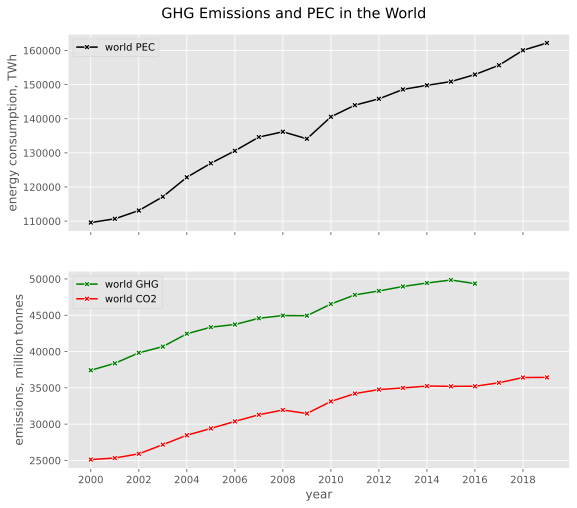

In [14]:
fig, (ax0, ax1) = plt.subplots(2, sharex=True, figsize=(9, 8))

# world energy consumption
sns.lineplot(x=pec.index,
             y=pec.primary_energy_consumption,
             ax=ax0,
             color='black',
             marker='X',
             label='world PEC')

# world ghg
sns.lineplot(x=ghg.index,
             y=ghg.total_ghg,
             ax=ax1,
             color='green',
             marker='X',
             label='world GHG')

# world co2
sns.lineplot(x=ghg.index,
             y=ghg.co2,
             ax=ax1,
             color='red',
             marker='X',
             label='world CO2')

# setting labels and legend
ax0.set_title('GHG Emissions and PEC in the World', x=0.45, y=1.05)
ax0.set_ylabel('energy consumption, TWh')
ax0.legend(loc='upper left')
ax1.set_ylabel('emissions, million tonnes')
ax1.legend(loc='upper left')

# fig.savefig('graph_1.png', dpi=600)
plt.show()

### Observations
We can already see that the dynamics of all three lines are incredibly similar visually, which only proves theoretical knowledge that energy consumption, which involves burning, flaring or some similar combustion reactions, causes GHG emissions and CO₂ in particular.

It should be noted, though, that visually the slope of world PEC line is higher than those of world GHG and world CO₂. Obviously, it can be caused by scaling of the graphs and axes, but even in that case some dynamics like those in 2006-2009 differ. The PEC graph had a distinct 'hump' while GHG and CO₂ graphs did not show such drastic changes.

Besides, there was a significant slump in 2009 with the preceding decline in growth of GHG emissions and PEC. Based on the events of these years we can safely assume that this decline was caused by the world economic crisis, which led to bankrupcy of many firms, causing a lot of plants to reduce production and/or shutdown. This is a unique decline in the 21<sup>st</sup> century, as one can see above.

When the data for 2020-2021 finally comes out, it would be interesting to study how COVID-19 has affected GHG emissions and PEC. We can expect a decline, but doubtfully as significant as that in 2009.

### Graph 2: World PEC by Source
Let us now look at the distribution of energy consumption in the world by source:

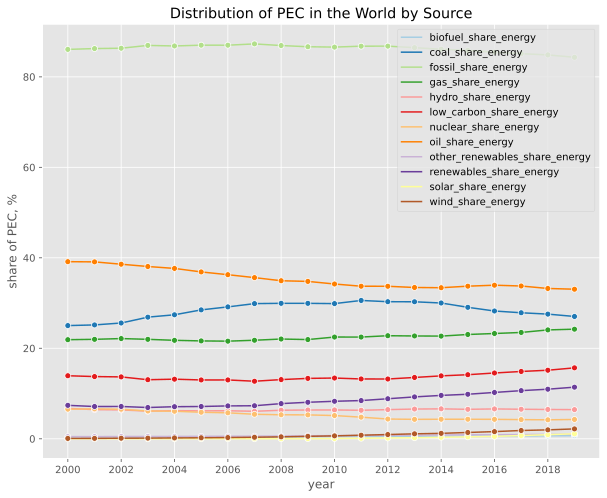

In [15]:
# only share columns
sns.lineplot(data=pec[pec_share_cols],
             palette='Paired',
             marker='o',
             dashes=None)
plt.title('Distribution of PEC in the World by Source')
plt.ylabel('share of PEC, %')

# plt.savefig('graph_2.png', dpi=600)
plt.show()

### Observations
- Firstly, we can see that while oil's share has been declining throughout the years from ~40% to ~33%, coal's share has shown a mild fluctuation with rise from ~25% to ~30% between 2000 and 2011 and a following decline  to ~27% from 2011 to 2018
- Secondly, gas' share, being stable in 2000-2014 at ~22%, has recently began to go up to ~24%, showing the dynamics similar to low carbon's share
- Thirdly, more environment-friendly sources' shares, those of wind, sun, renewables in general, have been steadily rising from about 2003
- The most stable share looks like that of hydroenergy, keeping at ~6.5% throughout the whole period
- Besides, nuclear energy's share has been gradually dropping from ~6.5% to ~4%
- Overall, all shares were quite stable

### Graph 3: World GHG Emissions by Source
It should be noted that there is no data as to total GHG emissions in 2017-2020. Still, let us look at the distribution of GHG emissions by source:

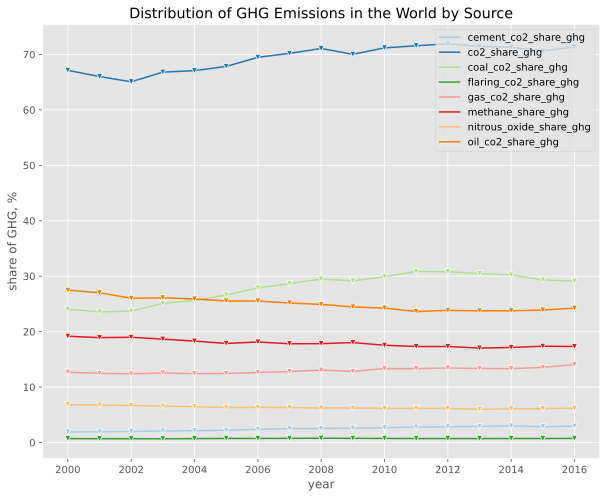

In [16]:
# only share columns
sns.lineplot(data=ghg[ghg_share_cols],
             palette='Paired',
             marker='v',
             dashes=None)
plt.title('Distribution of GHG Emissions in the World by Source')
plt.ylabel('share of GHG, %')

plt.show()

### Observations
- Firstly, one can see that the CO₂ emissions from coal production's share of GHG emissions by the end of 2000s had taken the lead at about 30% and fluctuated slightly around that level
- Secondly, that of oil production experienced a gradual decrease in 2000-2011, losing its first place to that of coal, then leveled off in 2011-2015 and increased a little in 2016
- Thirdly, while methane's and N₂O's shares were moderately falling throughout the period, those of gas flaring, gas, and cement production's CO₂ did not show any significant changes at all

### Graph 4: Changes in World PEC Sources and CO₂
Let us observe how did the consumption of energy and CO₂ emissions change over the period:

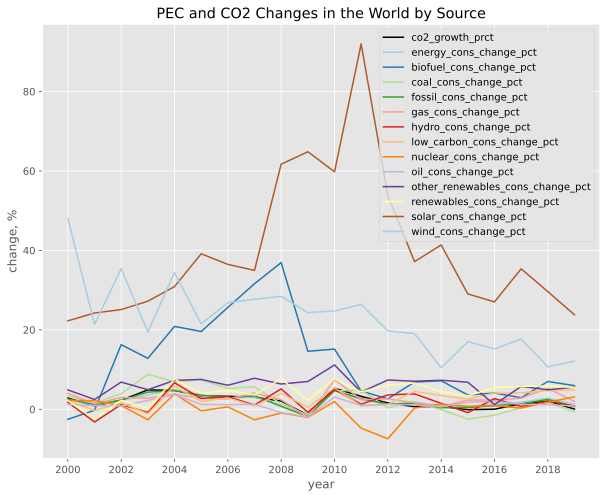

In [17]:
fig, ax = plt.subplots()

sns.lineplot(x=ghg.index,
             y=ghg.co2_growth_prct,
             ax=ax,
             color='black',
             label='co2_growth_prct')

sns.lineplot(data=pec[pec_change_cols],
             palette='Paired',
             dashes=None,
             ax=ax)

ax.set_title('PEC and CO2 Changes in the World by Source')
ax.set_ylabel('change, %')

plt.show()

### Observations
- The most volatile seems to be solar energy consumption
- Energy from biofuel consumption takes the second place in volatility
- Energy consumption changes less than almost every component of it
- CO₂ emissions are not very volatile in comparison to other features
- Vast majority of changes in energy sources never dropped below -5% in the 21<sup>st</sup> century; they usually grow with a positive rate

### Graph 5: World PEC per Capita by Source
Let us visualize per capita primary energy consumption in the world:

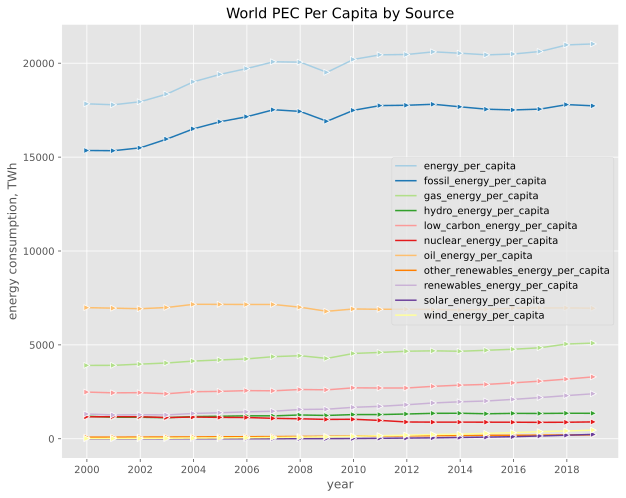

In [18]:
sns.lineplot(data=pec[pec_per_capita_cols],
             palette='Paired',
             marker='>',
             dashes=None)
plt.title('World PEC Per Capita by Source')
plt.ylabel('energy consumption, TWh')

plt.show()

### Observations
As we can see, all sources' PEC per capita were stable, but some points can be made:
- The decline in 2007-2008 and significant slump in 2009 are more observable than in overall dynamics (ref. to the whole project)
- Low carbon, gas, and renewables PEC per capita show the most significant rise, but even they are not very volatile
- Growth of PEC per capita slowed down since 2007: in 2010s the dynamics are more stable then those of 2000s
- Again, referring to the whole project, we can safely assume that the difference between the slopes of PEC per capita and PEC can be explained by the population growth
- The dynamics of PEC per capita and fossil PEC per capita are incredibly similar, only in 2018-2019 they slighly diverge
- Judging by the current situation with COVID-19 and the global economic and financial crisis in 2007-2009, we can expect at least decline in growth of PEC per capita, if not a significant decrease

### Graph 6: GHG Emissions Per Capita
Previously there was a problem with CO₂ per capita, as the initial column `co2_per_capita` was measured in million tonnes per person, which resulted in all zeros. How we dealt with this problem:

In [19]:
ghg.co2_per_capita, wrld_ghg.co2 / wrld_ghg.population

(year
 2000-01-01    4.089
 2001-01-01    4.071
 2002-01-01    4.112
 2003-01-01    4.259
 2004-01-01    4.406
 2005-01-01    4.496
 2006-01-01    4.586
 2007-01-01    4.667
 2008-01-01    4.705
 2009-01-01    4.578
 2010-01-01    4.763
 2011-01-01    4.858
 2012-01-01    4.878
 2013-01-01    4.852
 2014-01-01    4.831
 2015-01-01    4.771
 2016-01-01    4.719
 2017-01-01    4.729
 2018-01-01    4.773
 2019-01-01    4.724
 Name: co2_per_capita, dtype: float64,
 year
 2000-01-01    0.000004
 2001-01-01    0.000004
 2002-01-01    0.000004
 2003-01-01    0.000004
 2004-01-01    0.000004
 2005-01-01    0.000004
 2006-01-01    0.000005
 2007-01-01    0.000005
 2008-01-01    0.000005
 2009-01-01    0.000005
 2010-01-01    0.000005
 2011-01-01    0.000005
 2012-01-01    0.000005
 2013-01-01    0.000005
 2014-01-01    0.000005
 2015-01-01    0.000005
 2016-01-01    0.000005
 2017-01-01    0.000005
 2018-01-01    0.000005
 2019-01-01    0.000005
 dtype: float64)

In [20]:
ghg.loc[:, 'co2_per_capita'] = wrld_ghg.co2 / wrld_ghg.population * 1e6

In [21]:
ghg.co2_per_capita

year
2000-01-01    4.088722
2001-01-01    4.070982
2002-01-01    4.111730
2003-01-01    4.258799
2004-01-01    4.406400
2005-01-01    4.495767
2006-01-01    4.585864
2007-01-01    4.666583
2008-01-01    4.705497
2009-01-01    4.578098
2010-01-01    4.762505
2011-01-01    4.858492
2012-01-01    4.878031
2013-01-01    4.852211
2014-01-01    4.831181
2015-01-01    4.771059
2016-01-01    4.718691
2017-01-01    4.729334
2018-01-01    4.772543
2019-01-01    4.724384
Name: co2_per_capita, dtype: float64

In [23]:
# though on the graph it may seem so, there wasn't and still isn't any similar problem with CO2
# from flaring, it is just that the flaring_co2 itself is low
ghg.flaring_co2_per_capita, (wrld_ghg.flaring_co2 / wrld_ghg.population * 1e6).round(3)

(year
 2000-01-01    0.043
 2001-01-01    0.043
 2002-01-01    0.044
 2003-01-01    0.043
 2004-01-01    0.047
 2005-01-01    0.049
 2006-01-01    0.049
 2007-01-01    0.050
 2008-01-01    0.052
 2009-01-01    0.050
 2010-01-01    0.050
 2011-01-01    0.049
 2012-01-01    0.049
 2013-01-01    0.048
 2014-01-01    0.049
 2015-01-01    0.049
 2016-01-01    0.050
 2017-01-01    0.054
 2018-01-01    0.056
 2019-01-01    0.056
 Name: flaring_co2_per_capita, dtype: float64,
 year
 2000-01-01    0.043
 2001-01-01    0.043
 2002-01-01    0.044
 2003-01-01    0.043
 2004-01-01    0.047
 2005-01-01    0.049
 2006-01-01    0.049
 2007-01-01    0.050
 2008-01-01    0.052
 2009-01-01    0.050
 2010-01-01    0.050
 2011-01-01    0.049
 2012-01-01    0.049
 2013-01-01    0.048
 2014-01-01    0.049
 2015-01-01    0.049
 2016-01-01    0.050
 2017-01-01    0.054
 2018-01-01    0.056
 2019-01-01    0.056
 dtype: float64)

Now that we have corrected the mistakes, let us study GHG emissions per capita in the world:

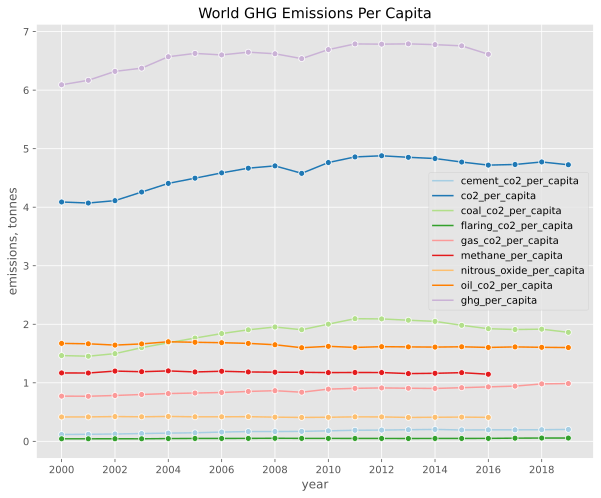

In [24]:
sns.lineplot(data=ghg[ghg_per_capita_cols],
             palette='Paired',
             marker='o',
             dashes=None)
plt.title('World GHG Emissions Per Capita')
plt.ylabel('emissions, tonnes')

plt.show()

### Observations
Even though a lot of data for 2016-2020 is missing, we can still make some conclusions:
- The dynamics of all sources' emissions per capita are stable, but there are some exceptions
- A slight increase can be seen in gas CO₂ emissions per capita in 2016-2018
- The most volatile is coal CO₂ emissions per capita, showing a significant rise between 2000 and 2011 with the slump in 2009 and a following decline in 2011-2018
- Again, as in the previous graph, the aggregate features show very similar dynamics, in this case GHG and CO₂ emissions per capita
- A more or less optimistic conclusion can be made based on aggregate features in 2012-2018; it can be seen that emissions per capita are not rising, sometimes levelling off or decreasing, which proves that the overall growth of GHG emissions can be explained by the population growth

### Graph 7: Correlation Matrix between PEC and GHG Emissions
In order to plot correlation between PEC and GHG emissions in the world, we took the following steps:
1. Stacked the matrices horizontally with the corresponding keys
2. Computed correlation
3. Selected correlation between the columns of two matrices

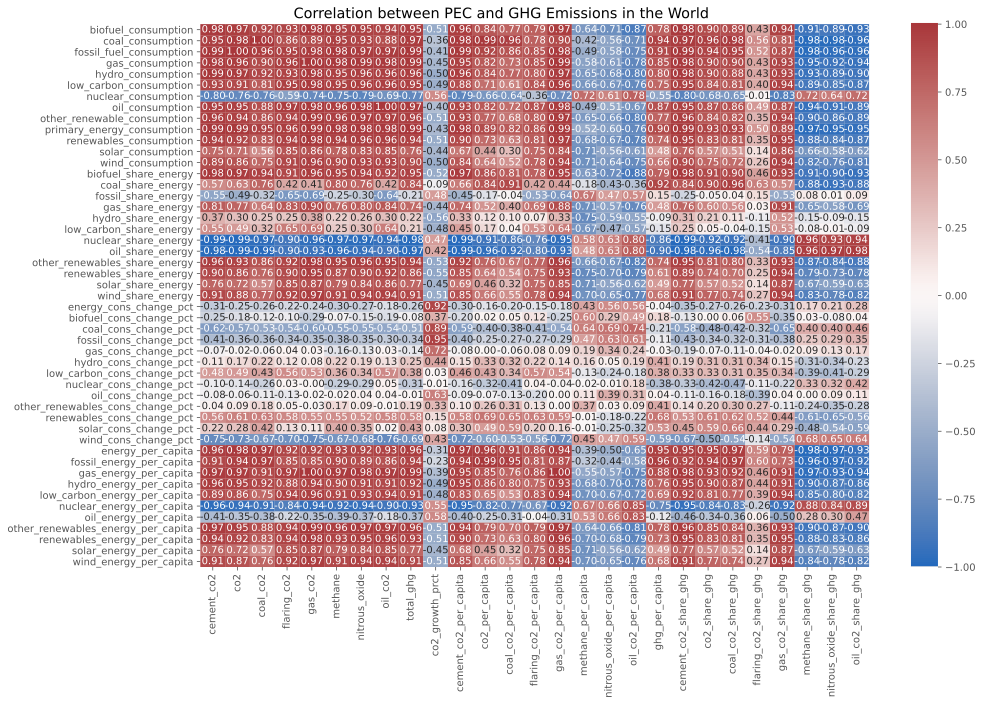

In [25]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(
    pd.concat(
        [pec, ghg],
        axis=1,
        keys=['pec', 'ghg']).corr().loc['pec', 'ghg'],
    vmin=-1,
    vmax=1,
    annot=True,
    fmt='.2f',
    cmap='vlag',
    ax=ax
)
plt.title('Correlation between PEC and GHG Emissions in the World', x=0.45)

plt.show()

## Observations
While this matrix can be studied for hours, let us select a few interesting points:
- There are **a lot** of very saturated red cells in it, which means there is a high correlation between PEC and GHG emissions
- A lot of blue cells are present in nuclear consumption, nuclear share and nuclear energy per capita rows, because it is one of the most environmentally-friendly source of energy
- We should be careful to interpret blue cells in oil share row; knowing that it is a fossil fuel and referring to the whole project (share dynamics), we can say that negative correlation is caused by its decreasing share, while GHG emissions continues to grow. It does not in any way mean that oil is an ecologically justified source of energy
- 0.99 correlation between PEC and GHG emissions leaves no-one in doubt that the qualitative reasearches on this topic are supported by real data; energy consumption positively and almost linearly affects GHG emissions
- Relatively lower correlation can be seen between wind or solar consumption and different GHG sources
- Ecological sources of energy correlate with GHG sources, but it does not mean cause-effect relationship, it just means they are moving in the same direction
- The weakest correlation in general can be observed in rows of the matrix corresponding to the % changes in PEC
- Despite the previous statement, % changes in energy, coal and fossil fuels consumption strongly correlate with % changes in CO₂ emissions
- There are a lot of negative correlation coefficients in methane, N₂O and oil CO₂ columns, representing to per capita production and share in GHG emissions; this means that their dynamics differ from the global trend - steady growth

## Conclusions
Following the well-known principle 'correlation does not mean causation' we do not base our results on the data only, we use qualitative facts as well:
1. Considering the PEC and GHG emissions at the time of global economic and financial crisis of 2007-2009 and the current situation with COVID-19, isolation, decline in airservice, shutdown of many firms, and other recent developments in the world, we predict a slump in GHG emissions in 2020 with a probable continuation in 2021 in the absence of a reliable vaccine.
2. The cause-effect relationship of the energy consumption and GHG emissions with the qualitative support is well-proven in this project.
3. The correlation between some features does not represent the actual causation between them, which is why we should not always believe what we read in the news and think for ourselves.
4. A growing trend in PEC and GHG emissions does not represent per capita trends; therefore, the former is affected by world population growth.
5. While fossil fuels are still the primary source of PEC, more environment-friendly sources' shares have been steadily rising in recent years. We can only hope that this trend will follow in the years to come and maybe one day we can live in the world, where the renewable energy is the only energy.